<a id='TOC'></a>
# Project: *Analysis of Future of Buffalo Breeds and Milk Production growth in India*

`
By   : Shahapurkar, Gangaprasad
Email: garashah@iu.edu`

<img src="images/cover_photo.jpg" alt="Cover photo" style="width:=500px;height:=300px;"/>

## Abstract and objective


In this notebook we will load livestock data of India related to Buffalo and apply machine learning algorithm to the data predict milk production growth 

## Prepare the notebook (imports, helper functions)

The goal of this section is to import required libraries and define the custom functions required for processind data and implementing machine learning algorithm

In [1]:
# Check if python is installed 
try:
    !python --version
except:
    print("Seems python is not installed")

Python 3.7.4


In [7]:
# # List installed libraries 
# if sys.version_info >= (3, 8):
#     from importlib import metadata as importlib_metadata
# else:
#     import importlib_metadata

# dists = importlib_metadata.distributions()
# for dist in dists:
#     name = dist.metadata["Name"]
#     version = dist.version
#     license = dist.metadata["License"]
#     print(f'found distribution {name}=={version}')    

In [8]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
import pandas as pd
import sys

<a id=ImportData></a>
## Import data

The goal of this section is to import the data required from various sources

In [10]:
buffalo_df = pd.read_csv("project_data/buffalo_final_data.csv")

In [11]:
buffalo_df.head()

,State_name,Banni_male_total,Banni_female_total,Bhadawari_male_total,Bhadawari_female_total,Chilika_male_total,Chilika_female_total,Jaffarabadi_male_total,Jaffarabadi_female_total,Kalahandi_male_total,...,201516_yield_in_milk,201617_yield_in_milk,201718_yield_in_milk,201819_yield_in_milk,201314_milk_production,201415_milk_production,201516_milk_production,201617_milk_production,201718_milk_production,201819_milk_production
0,ANDAMAN & NICOBAR ISLANDS,0,0,0,0,0,0,0,0,0,...,3.83,3.63,3.64,3.84,1.80,1.72,1.09,1.51,1.55,1.97
1,ANDHRA PRADESH,0,0,0,0,0,0,1748,13313,0,...,5.52,5.65,7.34,7.52,9207.05,6573.96,7444.83,8308.18,9100.76,9932.01
2,ARUNACHAL PRADESH,0,0,0,0,0,0,0,0,0,...,2.61,2.55,2.54,2.55,NaN,0.10,0.40,0.44,0.53,0.70
3,ASSAM,0,0,0,0,0,0,0,0,0,...,3.33,3.64,3.43,3.43,122.13,119.93,116.90,114.89,115.44,117.13
4,BIHAR,0,0,2969,24121,0,0,3382,24984,0,...,4.27,4.30,4.38,4.39,3014.94,3248.01,3209.69,3358.03,3619.42,3850.61


In [12]:
buffalo_df.columns

Index(['State_name', 'Banni_male_total', 'Banni_female_total',
       'Bhadawari_male_total', 'Bhadawari_female_total', 'Chilika_male_total',
       'Chilika_female_total', 'Jaffarabadi_male_total',
       'Jaffarabadi_female_total', 'Kalahandi_male_total',
       'Kalahandi_female_total', 'Marathwadi_male_total',
       'Marathwadi_female_total', 'Mehsana_male_total', 'Mehsana_female_total',
       'Murrah_male_total', 'Murrah_female_total', 'Nagpuri_male_total',
       'Nagpuri_female_total', 'Nili_Ravi_male_total',
       'Nili_Ravi_female_total', 'Non_descript_male_total',
       'Non_descript_female_total', 'Pandharpuri_male_total',
       'Pandharpuri_female_total', 'Surti_male_total', 'Surti_female_total',
       'Toda_male_total', 'Toda_female_total', 'total_male', 'total_female',
       'total_buffalo', '201314_in_milk', '201415_in_milk', '201516_in_milk',
       '201617_in_milk', '201718_in_milk', '201819_in_milk',
       '201314_yield_in_milk', '201415_yield_in_milk', '20151

<a id=EDA></a>
## EDA
[Return to start](#TOC)

The goal of this section is to get familiar with the data that will be used for the end to end pipeline. It is very important to explore the data and summarize its main characteristics before diving in the machine learning models. It is also interesting to see how the different features are correlated with the target feature

In [18]:
buffalo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State_name                 36 non-null     object 
 1   Banni_male_total           36 non-null     int64  
 2   Banni_female_total         36 non-null     int64  
 3   Bhadawari_male_total       36 non-null     int64  
 4   Bhadawari_female_total     36 non-null     int64  
 5   Chilika_male_total         36 non-null     int64  
 6   Chilika_female_total       36 non-null     int64  
 7   Jaffarabadi_male_total     36 non-null     int64  
 8   Jaffarabadi_female_total   36 non-null     int64  
 9   Kalahandi_male_total       36 non-null     int64  
 10  Kalahandi_female_total     36 non-null     int64  
 11  Marathwadi_male_total      36 non-null     int64  
 12  Marathwadi_female_total    36 non-null     int64  
 13  Mehsana_male_total         36 non-null     int64  
 

In [19]:
buffalo_df.describe()

,Banni_male_total,Banni_female_total,Bhadawari_male_total,Bhadawari_female_total,Chilika_male_total,Chilika_female_total,Jaffarabadi_male_total,Jaffarabadi_female_total,Kalahandi_male_total,Kalahandi_female_total,...,201516_yield_in_milk,201617_yield_in_milk,201718_yield_in_milk,201819_yield_in_milk,201314_milk_production,201415_milk_production,201516_milk_production,201617_milk_production,201718_milk_production,201819_milk_production
count,36.000000,36.000000,36.000000,3.600000e+01,36.000000,36.000000,36.000000,3.600000e+01,36.0,36.000000,...,36.000000,34.000000,34.000000,34.000000,31.000000,35.000000,34.000000,33.000000,33.000000,33.000000
mean,1010.972222,9603.527778,7889.833333,4.082647e+04,26.916667,67.138889,3827.666667,4.538061e+04,1928.5,2016.361111,...,3.979722,4.195588,4.292647,4.440588,2272.295484,2134.527429,2248.744118,2462.546667,2613.923030,2791.360606
std,6065.833333,57621.166667,43553.422352,2.200156e+05,161.500000,402.833333,14390.313861,2.216522e+05,11571.0,12098.166667,...,1.976630,1.945710,2.131691,2.241055,3837.466181,3751.339931,3841.611369,4145.149001,4399.503224,4683.839298
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,...,3.242500,3.410000,3.325000,3.347500,19.220000,2.890000,7.297500,6.290000,5.800000,5.620000
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,...,4.190000,4.305000,4.425000,4.460000,286.610000,233.450000,281.430000,337.600000,355.160000,372.030000
75%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,132.750000,3.210000e+02,0.0,0.000000,...,5.082500,5.170000,5.070000,5.165000,3418.680000,3135.245000,3186.797500,3358.030000,3619.420000,3850.610000
max,36395.000000,345727.000000,261685.000000,1.322035e+06,969.000000,2417.000000,82521.000000,1.329863e+06,69426.0,72589.000000,...,8.210000,8.390000,8.770000,9.260000,16804.500000,17523.930000,16864.510000,17691.890000,18517.160000,19462.980000


In [21]:
corr_matrix = buffalo_df.corr()

,Banni_male_total,Banni_female_total,Bhadawari_male_total,Bhadawari_female_total,Chilika_male_total,Chilika_female_total,Jaffarabadi_male_total,Jaffarabadi_female_total,Kalahandi_male_total,Kalahandi_female_total,...,201516_yield_in_milk,201617_yield_in_milk,201718_yield_in_milk,201819_yield_in_milk,201314_milk_production,201415_milk_production,201516_milk_production,201617_milk_production,201718_milk_production,201819_milk_production
Banni_male_total,1.000000,1.000000,-0.031055,-0.031811,-0.028571,-0.028571,0.937456,0.993435,-0.028571,-0.028571,...,0.082415,0.068510,0.060290,0.055933,0.188977,0.198960,0.196088,0.182780,0.176243,0.171206
Banni_female_total,1.000000,1.000000,-0.031055,-0.031811,-0.028571,-0.028571,0.937456,0.993435,-0.028571,-0.028571,...,0.082415,0.068510,0.060290,0.055933,0.188977,0.198960,0.196088,0.182780,0.176243,0.171206
Bhadawari_male_total,-0.031055,-0.031055,1.000000,0.999888,-0.031055,-0.031055,0.280738,0.043200,-0.031055,-0.031055,...,0.038993,0.029625,0.023629,0.013955,0.711883,0.724377,0.683131,0.670656,0.660564,0.651332
Bhadawari_female_total,-0.031811,-0.031811,0.999888,1.000000,-0.031811,-0.031811,0.280990,0.042717,-0.031811,-0.031811,...,0.039140,0.029498,0.023535,0.013747,0.713156,0.726110,0.684945,0.672506,0.662534,0.653463
Chilika_male_total,-0.028571,-0.028571,-0.031055,-0.031811,1.000000,1.000000,-0.044931,-0.034980,1.000000,1.000000,...,-0.001710,-0.023211,-0.029231,-0.037103,-0.096741,-0.090000,-0.091836,-0.095428,-0.095854,-0.096020
Chilika_female_total,-0.028571,-0.028571,-0.031055,-0.031811,1.000000,1.000000,-0.044931,-0.034980,1.000000,1.000000,...,-0.001710,-0.023211,-0.029231,-0.037103,-0.096741,-0.090000,-0.091836,-0.095428,-0.095854,-0.096020
Jaffarabadi_male_total,0.937456,0.937456,0.280738,0.280990,-0.044931,-0.044931,1.000000,0.967563,-0.044931,-0.044931,...,0.107715,0.091383,0.083691,0.074229,0.440064,0.455676,0.440351,0.424430,0.415536,0.408396
Jaffarabadi_female_total,0.993435,0.993435,0.043200,0.042717,-0.034980,-0.034980,0.967563,1.000000,-0.034980,-0.034980,...,0.094928,0.080373,0.072547,0.066226,0.260342,0.272410,0.266070,0.251851,0.244578,0.238783
Kalahandi_male_total,-0.028571,-0.028571,-0.031055,-0.031811,1.000000,1.000000,-0.044931,-0.034980,1.000000,1.000000,...,-0.001710,-0.023211,-0.029231,-0.037103,-0.096741,-0.090000,-0.091836,-0.095428,-0.095854,-0.096020
Kalahandi_female_total,-0.028571,-0.028571,-0.031055,-0.031811,1.000000,1.000000,-0.044931,-0.034980,1.000000,1.000000,...,-0.001710,-0.023211,-0.029231,-0.037103,-0.096741,-0.090000,-0.091836,-0.095428,-0.095854,-0.096020


In [24]:
corr_matrix["total_buffalo"].sort_values(ascending=False)

total_buffalo                1.000000
total_female                 0.999127
201314_in_milk               0.983529
201415_in_milk               0.983096
201617_in_milk               0.982977
201516_in_milk               0.982807
201718_in_milk               0.981096
201819_in_milk               0.980623
total_male                   0.970738
201314_milk_production       0.961203
201415_milk_production       0.959260
201516_milk_production       0.948116
201617_milk_production       0.945287
201718_milk_production       0.941339
201819_milk_production       0.937367
Murrah_female_total          0.929019
Murrah_male_total            0.908522
Non_descript_female_total    0.904049
Non_descript_male_total      0.841632
Bhadawari_female_total       0.808130
Bhadawari_male_total         0.805713
Jaffarabadi_male_total       0.495440
Surti_male_total             0.322048
Surti_female_total           0.313184
201415_yield_in_milk         0.300994
201718_yield_in_milk         0.293118
Jaffarabadi_

In [25]:
corr_matrix.tail(10)

,Banni_male_total,Banni_female_total,Bhadawari_male_total,Bhadawari_female_total,Chilika_male_total,Chilika_female_total,Jaffarabadi_male_total,Jaffarabadi_female_total,Kalahandi_male_total,Kalahandi_female_total,...,201516_yield_in_milk,201617_yield_in_milk,201718_yield_in_milk,201819_yield_in_milk,201314_milk_production,201415_milk_production,201516_milk_production,201617_milk_production,201718_milk_production,201819_milk_production
201516_yield_in_milk,0.082415,0.082415,0.038993,0.039140,-0.001710,-0.001710,0.107715,0.094928,-0.001710,-0.001710,...,1.000000,0.972692,0.964750,0.920782,0.397964,0.424271,0.434200,0.457594,0.462850,0.465781
201617_yield_in_milk,0.068510,0.068510,0.029625,0.029498,-0.023211,-0.023211,0.091383,0.080373,-0.023211,-0.023211,...,0.972692,1.000000,0.981834,0.973525,0.394124,0.423724,0.441187,0.442148,0.447287,0.450214
201718_yield_in_milk,0.060290,0.060290,0.023629,0.023535,-0.029231,-0.029231,0.083691,0.072547,-0.029231,-0.029231,...,0.964750,0.981834,1.000000,0.986066,0.423052,0.435279,0.457213,0.460945,0.467826,0.472142
201819_yield_in_milk,0.055933,0.055933,0.013955,0.013747,-0.037103,-0.037103,0.074229,0.066226,-0.037103,-0.037103,...,0.920782,0.973525,0.986066,1.000000,0.390717,0.410085,0.432136,0.436212,0.442981,0.447337
201314_milk_production,0.188977,0.188977,0.711883,0.713156,-0.096741,-0.096741,0.440064,0.260342,-0.096741,-0.096741,...,0.397964,0.394124,0.423052,0.390717,1.000000,0.989224,0.989337,0.987789,0.986985,0.985599
201415_milk_production,0.198960,0.198960,0.724377,0.726110,-0.090000,-0.090000,0.455676,0.272410,-0.090000,-0.090000,...,0.424271,0.423724,0.435279,0.410085,0.989224,1.000000,0.997422,0.994889,0.992907,0.990579
201516_milk_production,0.196088,0.196088,0.683131,0.684945,-0.091836,-0.091836,0.440351,0.266070,-0.091836,-0.091836,...,0.434200,0.441187,0.457213,0.432136,0.989337,0.997422,1.000000,0.999363,0.998476,0.997119
201617_milk_production,0.182780,0.182780,0.670656,0.672506,-0.095428,-0.095428,0.424430,0.251851,-0.095428,-0.095428,...,0.457594,0.442148,0.460945,0.436212,0.987789,0.994889,0.999363,1.000000,0.999711,0.998925
201718_milk_production,0.176243,0.176243,0.660564,0.662534,-0.095854,-0.095854,0.415536,0.244578,-0.095854,-0.095854,...,0.462850,0.447287,0.467826,0.442981,0.986985,0.992907,0.998476,0.999711,1.000000,0.999717
201819_milk_production,0.171206,0.171206,0.651332,0.653463,-0.096020,-0.096020,0.408396,0.238783,-0.096020,-0.096020,...,0.465781,0.450214,0.472142,0.447337,0.985599,0.990579,0.997119,0.998925,0.999717,1.000000


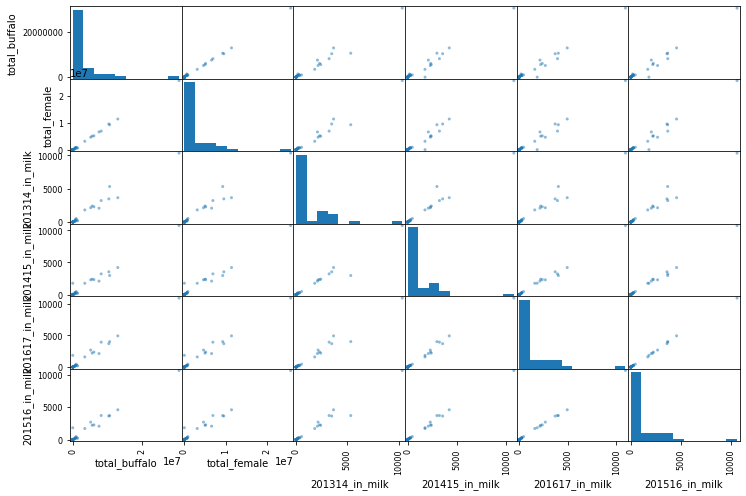

In [30]:
from pandas.plotting import scatter_matrix

# Top five correlated inputs with total buffalo
attributes = ["total_buffalo", "total_female", "201314_in_milk", "201415_in_milk", "201617_in_milk","201516_in_milk"]
scatter_matrix(buffalo_df[attributes], figsize=(12, 8));

<a id=FeatureEng></a>
## Feature Engineering 
[Return to start](#TOC)

When conducting an end to end Machine Learning project, after exploring and preprocessing the data it is essential to think of feature engineering. It consists of creating new feature(s) based on the features that already exist in the dataset that can be useful for training the model.

<a id=Modeling></a>
## Modeling
[Return to start](#TOC)

Now that we have explored the data, cleaned it, preprocessed it and added a new feature to it, we can start the modeling part of the project by applying Machine Learning algorithms.

<a id=Evaluate></a>
## Evaluation, reporting, analysis
[Return to start](#TOC)

After conducting an end to end Machine Learning project, it is time to evaluate our model, report our analysis and observations